# Function approximation with a deep neural network

## Quartic function and training dataset

In algebra, a quartic function is a function of the form
$$
f(t)=at^{4}+bt^{3}+ct^{2}+dt+e,
$$
where $a$ is nonzero, which is defined by a polynomial of degree four, called a quartic polynomial.

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch


Define and plot a quartic function

In [0]:
D_in = 1
D_out = 1

# Create random Tensors to hold inputs and outputs
x = torch.arange(-9,3.5,0.1).view(-1,1) #(-5,3.5,0.1)
y = x**4 + 2*x**3 - 12*x**2 -2*x + 6
y = torch.where(x < -5, torch.zeros_like(x), y)
N = x.shape[0]

In [16]:
print(x.size())
print(y.size())


torch.Size([125, 1])
torch.Size([125, 1])


Converting Torch Tensor to NumPy Array for plotting the function

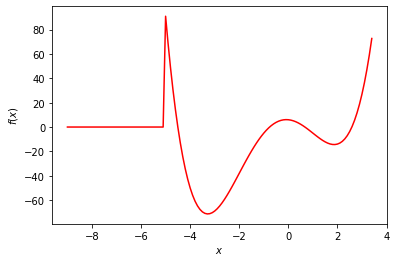

In [17]:
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
ax.legend()
plt.show()

## Approximation with a deep neural network

### Question: code a deep neural network to approximate the function. The network will have 3 full-connected layers (followed by a ReLU activation function) and a final full-connected layer without any activation function. You will use the Adam optimizer. Choose the most appropriate loss function. You must compute the loss at each epoch.

In [18]:
# Complete this cell: model and training

%time
Niter = 10000
H1 = 50
H2 = 40
H3 = 20

x.requires_grad_(True)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, H2),
    torch.nn.ReLU(),
    torch.nn.Linear(H2, H3),  
    torch.nn.ReLU(),
    torch.nn.Linear(H3, D_out)
)

saveLoss = np.zeros(Niter)
loss_fn = torch.nn.MSELoss(reduction='mean')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(Niter):

    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    saveLoss[t] = loss.item()
    if t % 1000 == 0:
        # Print Loss
        print('Iteration: {}. Loss: {}.'.format(iter, loss.item()))

    optimizer.zero_grad()
    
    #Backward
    loss.backward()
    optimizer.step()    


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
Iteration: <built-in function iter>. Loss: 948.439697265625.
Iteration: <built-in function iter>. Loss: 74.92158508300781.
Iteration: <built-in function iter>. Loss: 21.23672103881836.
Iteration: <built-in function iter>. Loss: 7.411784648895264.
Iteration: <built-in function iter>. Loss: 0.6711149215698242.
Iteration: <built-in function iter>. Loss: 0.2585134208202362.
Iteration: <built-in function iter>. Loss: 0.12378253787755966.
Iteration: <built-in function iter>. Loss: 0.06133127585053444.
Iteration: <built-in function iter>. Loss: 0.21618150174617767.
Iteration: <built-in function iter>. Loss: 0.03235378861427307.


Plot the training error as a function of the epoch

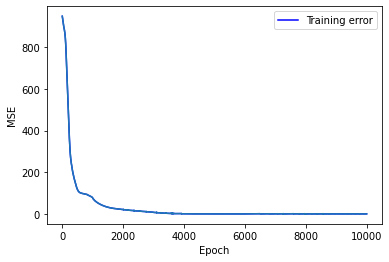

In [19]:
fig, ax = plt.subplots()
plt.plot(range(Niter),saveLoss,'b-',label='Training error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(saveLoss)
ax.legend()
plt.show()

### Question: plot on the same graph the quartic function and its approximation

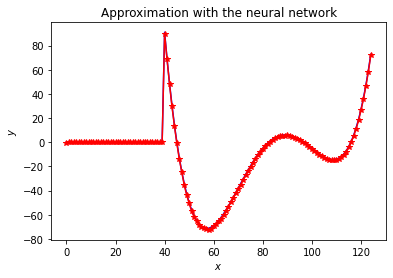

In [20]:
# Complete this cell

plt.figure(figsize=(6, 4))
plt.plot(y.detach().numpy(),'b-')
plt.plot(y_pred.detach().numpy(),'r-*')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Approximation with the neural network')
plt.show()

How many parameters?

In [0]:
# Function to count the number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


In [22]:
print(model.parameters)
print("\nTotal number of parameters {}\n".format(count_parameters(model)))

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=1, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=40, bias=True)
  (3): ReLU()
  (4): Linear(in_features=40, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=1, bias=True)
)>

Total number of parameters 2981



Print all the parameters (just for seeing them)

In [23]:
for parameter in model.parameters():
    print(parameter)

Parameter containing:
tensor([[-1.4379e-01],
        [ 2.0061e-01],
        [ 2.0493e-02],
        [ 1.4720e-03],
        [ 7.4357e-01],
        [-1.1018e+00],
        [-3.3161e-01],
        [-4.3613e-01],
        [ 1.1552e+00],
        [-1.6675e-01],
        [ 8.7479e-03],
        [ 4.3677e-01],
        [ 2.2742e-01],
        [ 1.1072e+00],
        [ 4.5268e-02],
        [ 3.2711e-01],
        [-5.8035e-01],
        [-1.3952e+00],
        [-1.0102e+00],
        [-5.4382e-01],
        [ 3.0222e-01],
        [ 1.4871e+00],
        [ 5.2394e-01],
        [ 1.4740e+00],
        [ 2.2557e-01],
        [-9.5683e-02],
        [-4.9756e-01],
        [-8.0204e-01],
        [ 4.1183e-01],
        [-1.9688e-01],
        [-1.3456e+00],
        [ 5.7919e-01],
        [ 1.9636e-01],
        [ 1.3894e-01],
        [-8.2957e-01],
        [-6.3451e-01],
        [ 3.0161e-01],
        [-1.2437e+00],
        [-4.0047e-02],
        [-1.3225e+00],
        [ 1.3536e+00],
        [ 7.8056e-01],
        [ 3.

## Approximation with a shallow neural network

### Question: code a one-hidden layer neural network with approximatively the same number of parameters than the multilayer neural network. What is the "best" architecture?

**Answer:**

We have a complex discontinuity on the function as consequence of that the approximation accuracy of a shallow network will be worse than of a deep one, as we can see when comparing the charts.

In [24]:
%time

Niter = 10000
H1 = 500

# Use the nn package to define our model and loss function.
shallow_model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, D_out)
)

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3

optimizer = torch.optim.Adam(shallow_model.parameters(), lr=learning_rate)

for t in range(Niter):
    output = shallow_model(x)

    # Compute and print loss.
    loss = loss_fn(output, y)
    saveLoss[t] = loss.item()
    if t % 1000 == 0:
        # Print Loss
        print('Iteration: {}. Loss: {}.'.format(iter, loss.item()))

    optimizer.zero_grad()
    
    #Backward
    loss.backward()
    optimizer.step()  

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs
Iteration: <built-in function iter>. Loss: 936.2118530273438.
Iteration: <built-in function iter>. Loss: 313.9501953125.
Iteration: <built-in function iter>. Loss: 172.57449340820312.
Iteration: <built-in function iter>. Loss: 110.42237854003906.
Iteration: <built-in function iter>. Loss: 99.708740234375.
Iteration: <built-in function iter>. Loss: 96.62508392333984.
Iteration: <built-in function iter>. Loss: 95.94145965576172.
Iteration: <built-in function iter>. Loss: 95.80610656738281.
Iteration: <built-in function iter>. Loss: 95.72945404052734.
Iteration: <built-in function iter>. Loss: 95.68730926513672.


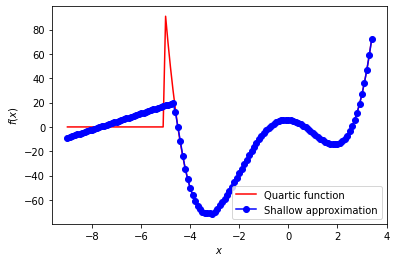

In [25]:
y_pred = shallow_model(x)
fig, ax = plt.subplots()
plt.plot(x.detach().numpy(), y.detach().numpy(),'r-',label='Quartic function')
plt.plot(x.detach().numpy(), y_pred.detach().numpy(),'bo-',label='Shallow approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()

In [26]:
print("\nTotal number of parameters {}\n".format(count_parameters(model)))


Total number of parameters 2981

